# TP Semanal 5

## Consignas:
1) Se debe diseñar un filtro pasa-altos, que presente máxima planicidad en la banda de paso (frecuencia de corte = 300 Hz) y un cero de transmisión en 100 Hz. El prototipo pasabajos normalizado presenta la siguiente respuesta:
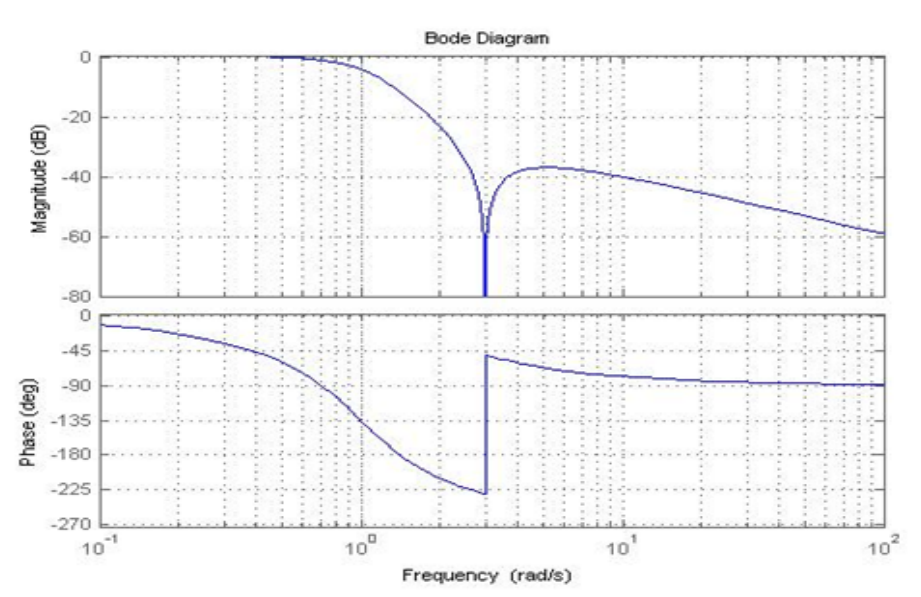
a) Determine la expresión de H(s) del filtro pasa-altos normalizado

b) Realizar el diagrama de polos y ceros de H(s)

c) Sintetice el circuito del filtro pedido. Se utilizará para la estructura de segundo orden el siguiente circuito:
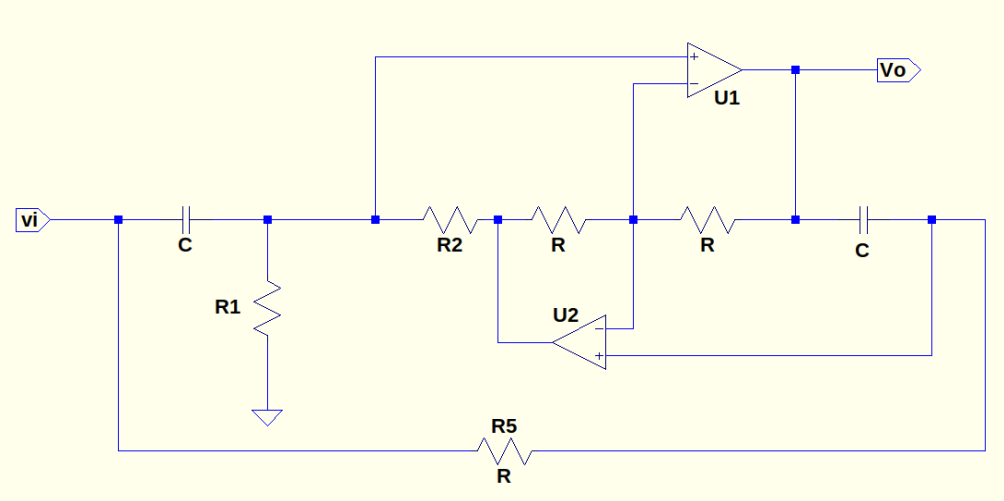

d) Compare la estructura sugerida y discuta las similitudes y diferencias con la red propuesta por Schaumann:
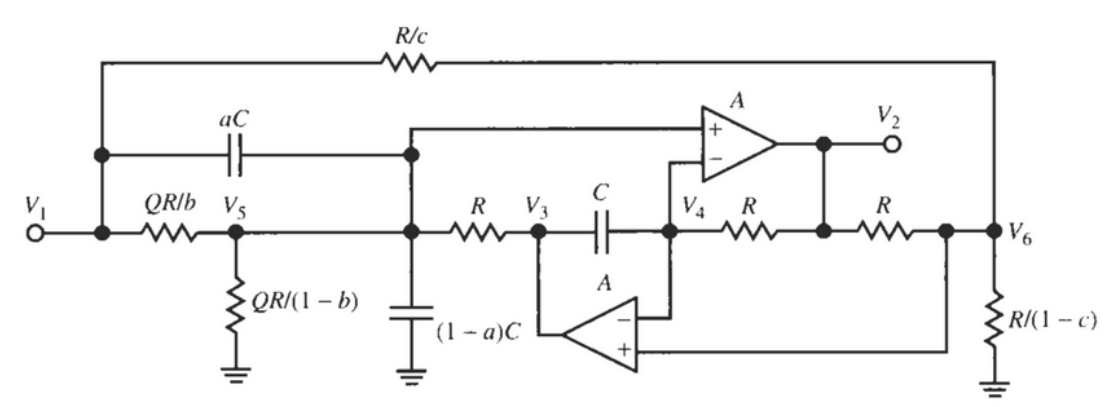

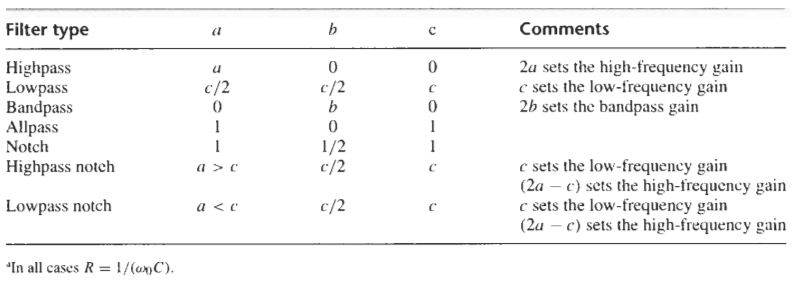

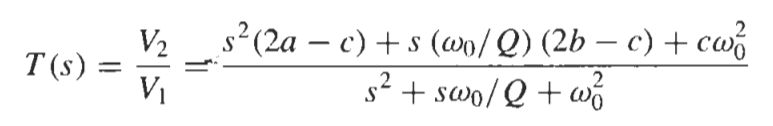

## Resolución:

In [1]:
from IPython.display import IFrame

IFrame(src='TS5.pdf', width=1000, height=1000)

## Simulaciones:

### Python

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def plot_tf(tf, xlim=None):
    # Imprimo transferencia
    print(tf.num)
    print("----------------")
    print(tf.den)

    # Configurar los límites en el eje X si se proporcionan
    if xlim:
        w = np.logspace(np.log10(xlim[0]), np.log10(xlim[1]), num=1000)
    else:
        w = np.logspace(-2, 2, num=1000)

    # Calcular la respuesta en frecuencia
    w, mag, phase = signal.bode(tf, w)

    # Graficar la respuesta en módulo
    plt.figure()
    plt.semilogx(w, mag)
    plt.xlabel('Frecuencia [rad/s]')
    plt.ylabel('Magnitud [dB]')
    plt.title('Respuesta en Módulo')
    plt.grid(True)

    # Graficar la respuesta en fase
    plt.figure()
    plt.semilogx(w, phase)
    plt.xlabel('Frecuencia [rad/s]')
    plt.ylabel('Fase [grados]')
    plt.title('Respuesta en Fase')
    plt.grid(True)

    # Obtener los polos y ceros
    poles = tf.poles
    zeros = tf.zeros

    # Configuración del gráfico
    fig, ax = plt.subplots()
    ax.set_aspect('equal')  # Proporción de ejes igual para una circunferencia circular
    ax.axhline(0, color='gray', lw=0.5)  # Eje horizontal
    ax.axvline(0, color='gray', lw=0.5)  # Eje vertical
    ax.grid(True, linestyle='--', alpha=0.5)  # Activar la grilla

    # Traza la circunferencia unitaria
    theta = np.linspace(0, 2 * np.pi, 100)
    x = np.cos(theta)
    y = np.sin(theta)
    ax.plot(x, y, color='gray', linewidth=0.5, linestyle='--')

    # Traza los polos y ceros
    ax.plot(np.real(poles), np.imag(poles), 'x')
    ax.plot(np.real(zeros), np.imag(zeros), 'o')

    # Etiquetas y leyenda
    ax.set_xlabel('Parte real')
    ax.set_ylabel('Parte imaginaria')
    ax.set_title('Diagrama de polos y ceros', pad=10, loc='center')

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()


plt.close("all")


#### Verificación del modelo pasa-bajos normalizado

[0.11111111 0.         1.        ]
----------------
[1.         2.41421356 2.41421356 1.        ]


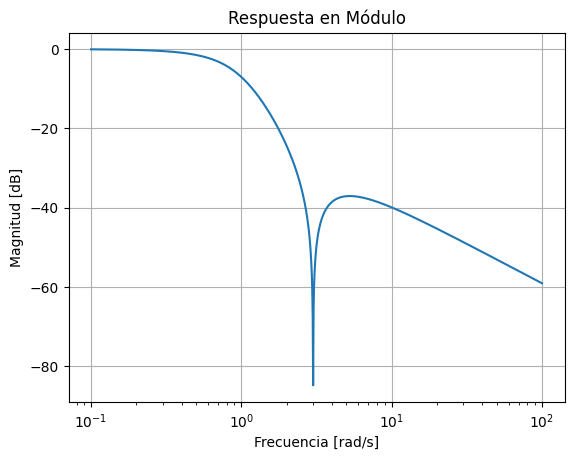

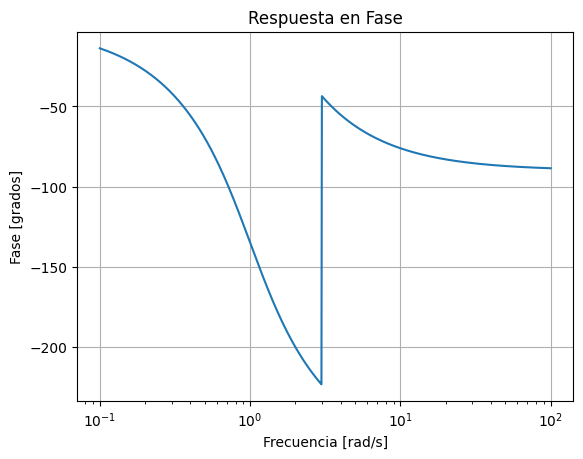

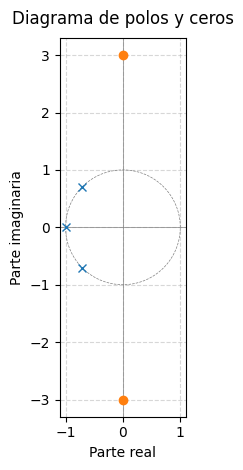

In [3]:
#Pasa Bajos
W0 = 1
WZ = 3
pInf = 1
Q = np.sqrt(2)/2
k=pInf/(WZ**2)
num = [1*k,0,k*WZ**2]
den1 = [1,W0/Q , W0**2]
den2 = [1,pInf]
den = np.polymul(den1, den2)
tf = signal.TransferFunction(num, den)
plot_tf(tf,xlim=[0.1,100])

#### Verificación del modelo pasa-altos normalizado

[1.         0.         0.11111111 0.        ]
----------------
[1.         2.41421356 2.41421356 1.        ]


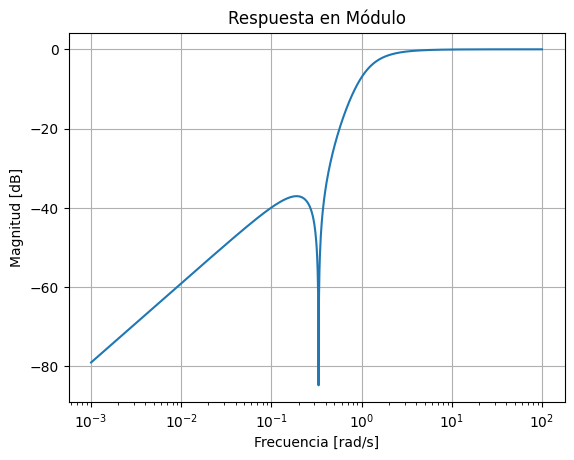

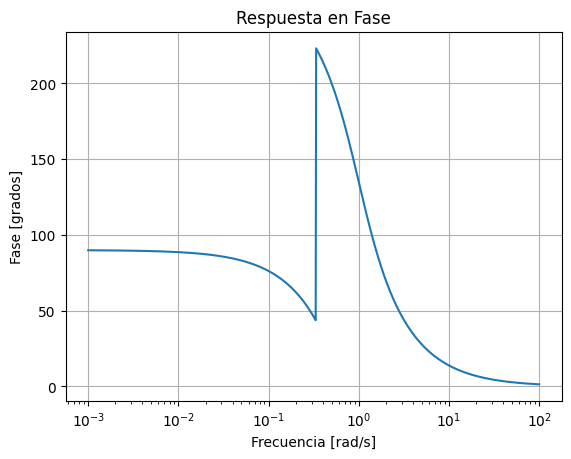

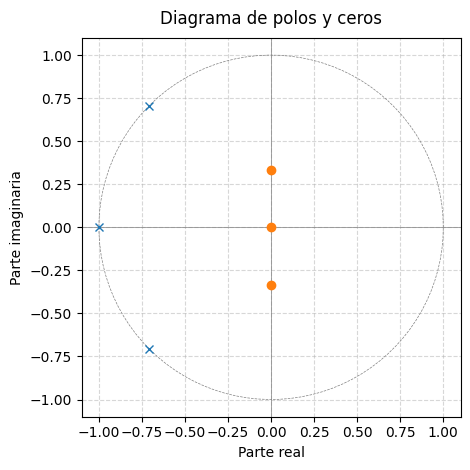

In [4]:
#Pasa Altos
num1 = [1,0,1/9]
den1 = [1,np.sqrt(2),1]
num2 = [1,0]
den2 = [1,1]
num = np.polymul(num1, num2)
den = np.polymul(den1, den2)
tf = signal.TransferFunction(num, den)
plot_tf(tf,xlim=[0.001,100])


#### Observaciones

Se puede observar que la transferencia pasabajos obtenida es igual a la que se plantea en la consigna.
Por otro lado, la transferencia pasa-altos tiene el cero de transmisión y la W0 en los puntos indicados por las consignas.
Por lo que puedo decir que es seguro continuar con la implementación

### LTSpice
#### Implementación con circuito propuesto
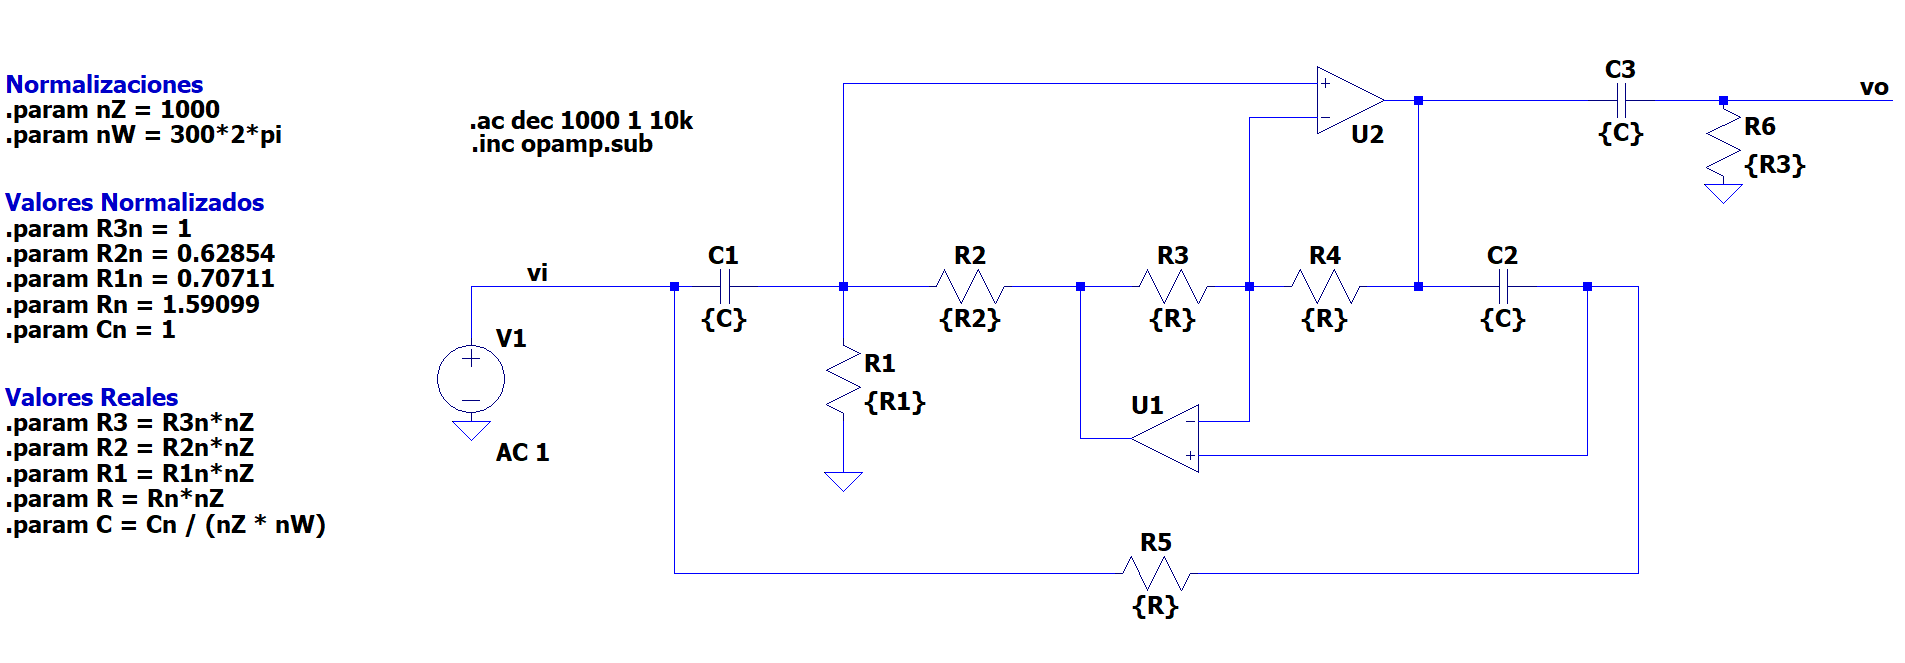

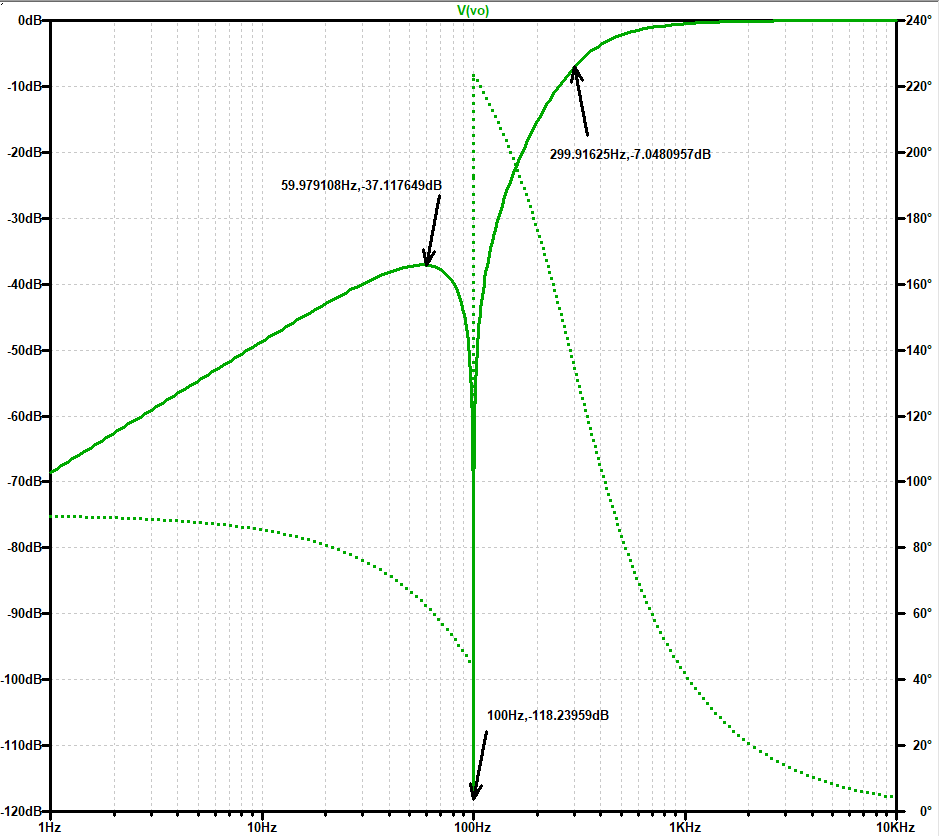

#### Implementación con circuito del Schawmann
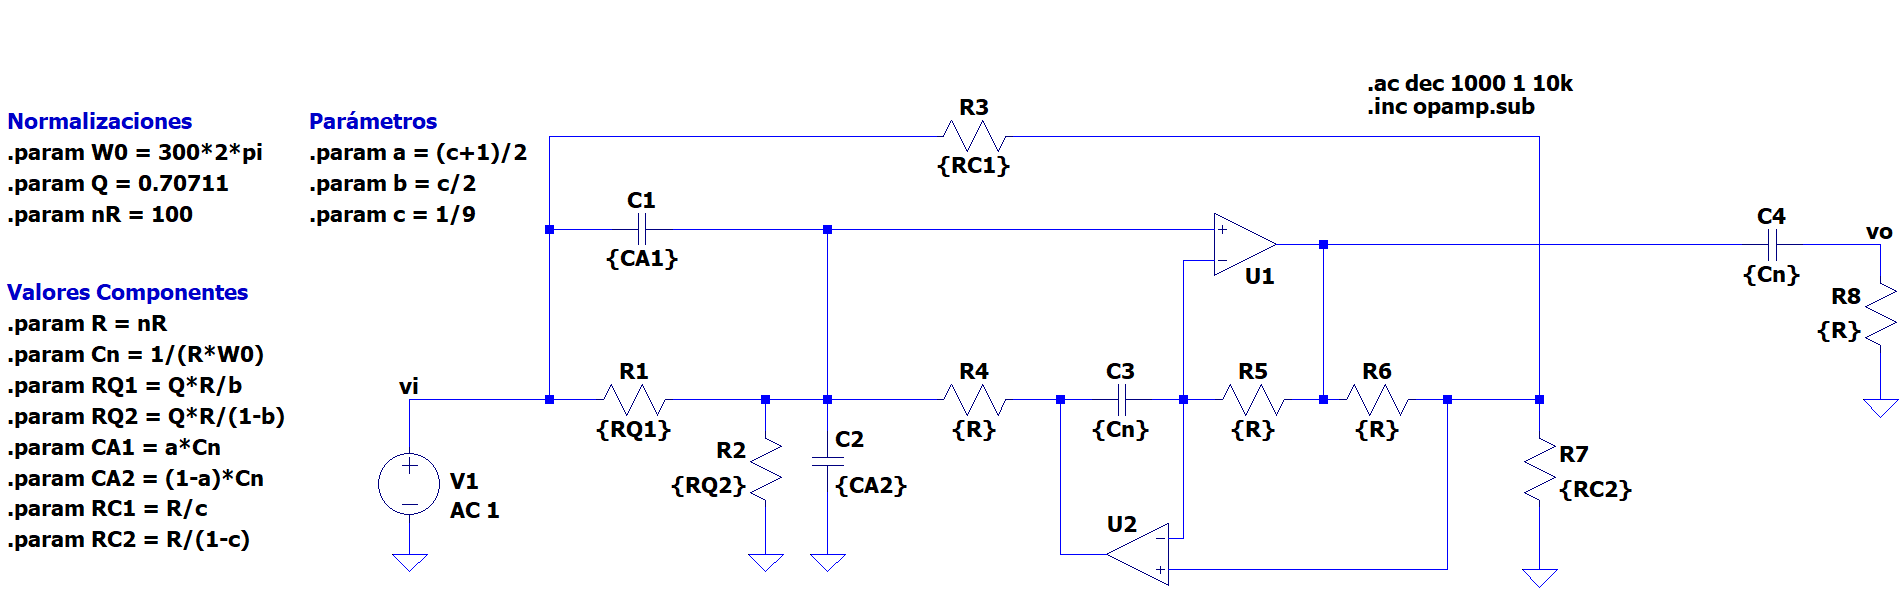

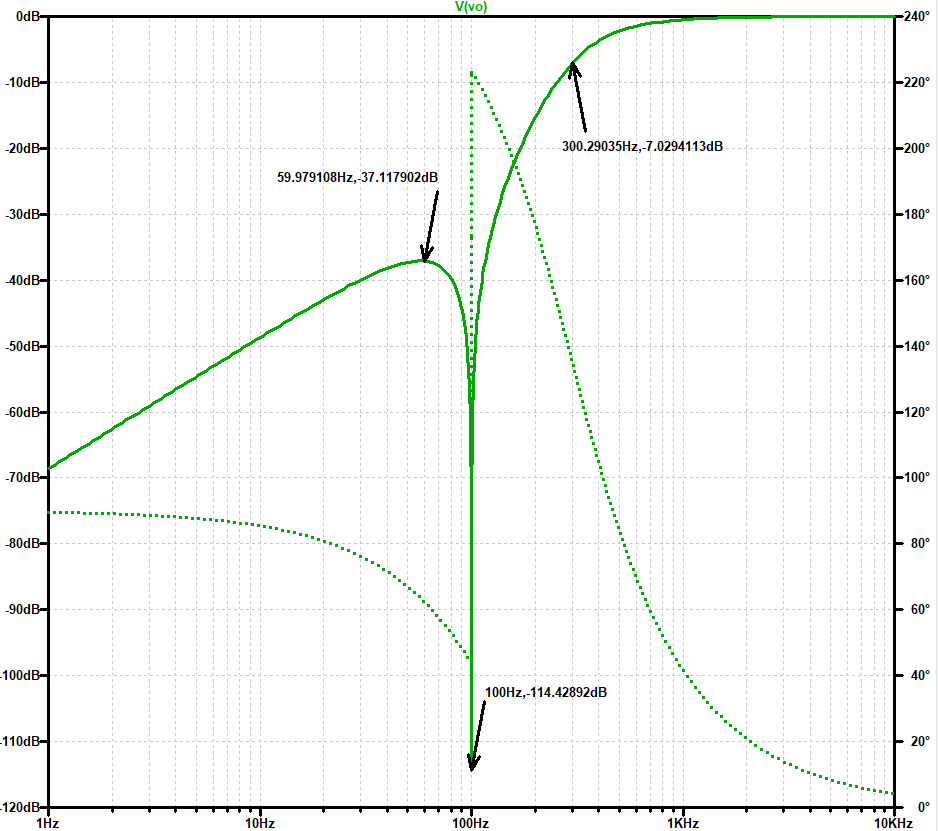

### Comparación de ambas implememtaciones
Se puede ver que ambas implementacioens tienen una respuesta prácticamente idéntica. Las dos implementaciones presentan la ventaja de tomar como salida del sistema la salida de un amplificador operaional. Esto es muy bueno, ya que hace que no sea necesario usar un buffer para separar etapas.

Sin embargo, con la implementación propuesta vemos que exclusivamente podemos obtener una salida notch (al menos manteniendo las relaciones propuestas del gic). En el cero de transmisión se ve apenas mejor el circuito propuesto pero creo que se debe al redondeo de los valores de componentes.

En cambio, con el circuito que plantea el Schawmann podemos manejar los ceros del sistema completamente a gusto del usuario, pudiendo así obtener cualquier tipo de filtrado. Además, un dato no menor es que este circuito usa más componentes.

En conclusión, el circuito propuesto por le Schawmann es más versátil (ya que es compatilble con todas las topologías de filtrado) pero más costoso. En cambio, el circuito propuesto en la consigna es más eficiente para implementar un filtro notch pasa-altos.
